In [2]:
1+1

2

## Basic ChatBot

In [3]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

# reducers in the form of add_messages

In [4]:
class State(TypedDict):
    messages: Annotated[list,add_messages]

In [5]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [6]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm = ChatGroq(model="llama3-8b-8192")

In [7]:
llm.invoke("Hi").content

"Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?"

In [8]:
llm = init_chat_model("groq:llama3-8b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000236F120BD10>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000236F1695340>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [9]:
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [10]:
graph_builder = StateGraph(State)
graph_builder.add_node("llmchatbot",chatbot)

graph_builder.add_edge(START, "llmchatbot")
graph_builder.add_edge("llmchatbot", END)

In [11]:
## compile the graph
graph = graph_builder.compile()

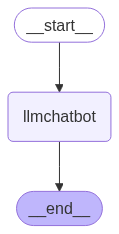

In [12]:
## Visualize the graph
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Error displaying graph: {e}")

In [13]:
response=graph.invoke({"messages":"What is Langgraph?"})

In [14]:
response["messages"]

[HumanMessage(content='What is Langgraph?', additional_kwargs={}, response_metadata={}, id='7102c9eb-f17b-4abb-ad6d-8c985a661c7d'),
 AIMessage(content='Langgraph is a graph-based language model that represents linguistic structures as graphs, where nodes represent words, phrases, or concepts, and edges represent relationships between them. The model is designed to capture the complex relationships between words and phrases in a language, allowing it to generate text that is coherent and natural-sounding.\n\nLanggraph is based on a combination of natural language processing (NLP) techniques, including graph theory, machine learning, and linguistics. It uses a graph structure to represent the syntax and semantics of language, allowing it to model the relationships between words and phrases in a more nuanced and flexible way than traditional language models.\n\nSome of the key features of Langgraph include:\n\n1. Graph-based representation: Langgraph represents linguistic structures as gr

In [15]:
response["messages"][-1].content

'Langgraph is a graph-based language model that represents linguistic structures as graphs, where nodes represent words, phrases, or concepts, and edges represent relationships between them. The model is designed to capture the complex relationships between words and phrases in a language, allowing it to generate text that is coherent and natural-sounding.\n\nLanggraph is based on a combination of natural language processing (NLP) techniques, including graph theory, machine learning, and linguistics. It uses a graph structure to represent the syntax and semantics of language, allowing it to model the relationships between words and phrases in a more nuanced and flexible way than traditional language models.\n\nSome of the key features of Langgraph include:\n\n1. Graph-based representation: Langgraph represents linguistic structures as graphs, allowing it to capture complex relationships between words and phrases.\n2. Contextualized embeddings: Langgraph uses contextualized word embeddi

In [16]:
for event in graph.stream({"messages":"What is Langgraph?"}):
    for value in event.values():
        print(value["messages"][-1].content)

Langgraph is a graph-based language model that represents natural language as a graph structure, where words, phrases, and sentences are connected by edges that capture their relationships. This approach allows Langgraph to model the complex relationships between words and phrases in a more nuanced and flexible way than traditional word-level language models.

In a Langgraph, each node represents a word or phrase, and each edge represents a relationship between two nodes, such as:

* Synonymy: two words that have similar meanings
* Hyponymy: a word that is a more specific instance of another word
* Hypernymy: a word that is a more general category of another word
* Co-occurrence: two words that frequently appear together in a sentence or text
* Contextual relationships: relationships between words based on their context, such as semantic role labeling (e.g., "agent", "patient", etc.)

Langgraph uses a combination of graph neural networks (GNNs) and graph attention mechanisms to learn t

In [17]:
## Chatbot with tool

In [18]:
from dotenv import load_dotenv
load_dotenv()

True

In [19]:
from langchain_tavily import TavilySearch

tool = TavilySearch(max_results=2)

tool.invoke("What is Langgraph?")

{'query': 'What is Langgraph?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'What is LangGraph? - GeeksforGeeks',
   'url': 'https://www.geeksforgeeks.org/machine-learning/what-is-langgraph/',
   'content': 'LangGraph is a Python library that helps you build applications like chatbots or AI agents by organizing their logic step-by-step using state machine model. This step configures your Gemini API key and then we create a simple function ask_gemini that takes user input, sends it to the Gemini model and returns the AI-generated response. Creates a state structure with three fields: question, classification and response which flows through the LangGraph. import matplotlib.pyplot as plt from langgraph.graph import StateGraph\u200bbuilder = StateGraph(GraphState)builder.add_node("classify", classify)builder.add_node("respond", respond)builder.set_entry_point("classify")builder.add_edge("classify", "respond")builder.set_finish_point("respond")app =

In [20]:
def multiply(a: int, b: int) -> int:
    """
    Multiplies two integers and returns the result.
    Args:
        a (int): The first integer.
        b (int): The second integer.
    Returns:
        int: The product of the two integers.
    """
    return a * b

In [21]:
tools = [tool, multiply]

In [22]:
llm_with_tools = llm.bind_tools(tools)

In [23]:
llm_with_tools

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000236F120BD10>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000236F1695340>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'Search query to look up', 'type': 'string'}, 'include_domains': {'anyOf': [{'items': {'type': 'string'}, 'type': 'array'}, {'type': 'null'}], 'default': [], 'description': 'A list 

In [25]:
## StateGraph
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## Node definition
def tool_calling_llm(state:State):
    """
    A node that calls the LLM with tools.
    Args:
        state (State): The current state of the graph.
    Returns:
        State: The updated state with the LLM response.
    """
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

## Graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node(
    "tools",ToolNode(tools)
)

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition
)
builder.add_edge("tools", END)

graph = builder.compile()

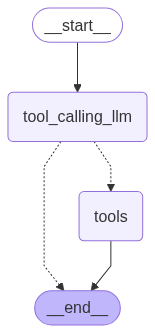

In [26]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Error displaying graph: {e}")

In [28]:
response = graph.invoke({"messages":"What is Recent News About Godavari Water in Telangana?"})

In [29]:
response["messages"][-1].content

'{"query": "Recent News About Godavari Water in Telangana", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.thehindu.com/news/national/telangana/telangana-sets-benchmark-with-104-lakh-crore-for-agriculture-since-cong-came-to-power/article69718147.ece", "title": "Telangana sets benchmark with ₹1.04 lakh crore for Agriculture since Cong. came to power - The Hindu", "score": 0.22438706, "published_date": "Fri, 20 Jun 2025 15:08:00 GMT", "content": "In addition, the State government has revived 16 Centrally-sponsored schemes that were previously stalled due to non-release of matching grants. A sum of ₹245 crore has been allocated for their reactivation.\\n\\nTelangana is also providing drip and sprinkler irrigation systems, including 100% for SC/ST farmers, 90% for small and marginal farmers, and 80% for others with 75% subsidy on sprinklers. Since December 2023, equipment worth ₹282 crore has been distributed to 40,265 farmers. [...] NewsIndia N

In [30]:
for  m in response["messages"]:
    m.pretty_print()


================================ Human Message =================================

What is Recent News About Godavari Water in Telangana?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (z3k7d8y1x)
 Call ID: z3k7d8y1x
  Args:
    exclude_domains: []
    include_domains: []
    include_images: False
    query: Recent News About Godavari Water in Telangana
    search_depth: advanced
    time_range: None
    topic: news
================================= Tool Message =================================
Name: tavily_search

{"query": "Recent News About Godavari Water in Telangana", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.thehindu.com/news/national/telangana/telangana-sets-benchmark-with-104-lakh-crore-for-agriculture-since-cong-came-to-power/article69718147.ece", "title": "Telangana sets benchmark with ₹1.04 lakh crore for Agriculture since Cong. came to power - The Hindu", "score":

In [31]:
response = graph.invoke({"messages":"What is 2 multiply 3?"})

In [32]:
for  m in response["messages"]:
    m.pretty_print()


================================ Human Message =================================

What is 2 multiply 3?
================================== Ai Message ==================================
Tool Calls:
  multiply (a8aj6hr3k)
 Call ID: a8aj6hr3k
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: multiply

6


In [33]:
response = graph.invoke({"messages":"What is Recent AI news and  2 multiply 3?"})

In [34]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is Recent AI news and  2 multiply 3?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (jxd87ede7)
 Call ID: jxd87ede7
  Args:
    query: Recent AI news
  multiply (qfk39f8zb)
 Call ID: qfk39f8zb
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: tavily_search

{"query": "Recent AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "AI News | Latest Headlines and Developments | Reuters", "url": "https://www.reuters.com/technology/artificial-intelligence/", "content": "Apple executives have held internal talks about potentially bidding for artificial intelligence startup Perplexity, Bloomberg News reported on Friday, citing people with knowledge of the matter.", "score": 0.69845337, "raw_content": null}, {"title": "AI News & Artificial Intelligen

In [35]:
## ReAct Agent

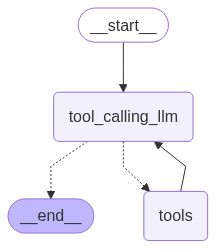

In [36]:
## StateGraph
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## Node definition
def tool_calling_llm(state:State):
    """
    A node that calls the LLM with tools.
    Args:
        state (State): The current state of the graph.
    Returns:
        State: The updated state with the LLM response.
    """
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

## Graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node(
    "tools",ToolNode(tools)
)

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition
)
builder.add_edge("tools", "tool_calling_llm")



graph = builder.compile()

from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Error displaying graph: {e}")

In [38]:
response = graph.invoke({"messages":"What is Recent News About Godavari Water in Telangana? And 2 multiply 3?"})
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is Recent News About Godavari Water in Telangana? And 2 multiply 3?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (ra0t28157)
 Call ID: ra0t28157
  Args:
    query: Recent News About Godavari Water in Telangana
  multiply (jda42frt4)
 Call ID: jda42frt4
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: tavily_search

{"query": "Recent News About Godavari Water in Telangana", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "Banakacherla project: What is the latest water dispute between Andhra ...", "url": "https://indianexpress.com/article/explained/explained-politics/banakacherla-water-dispute-andhra-pradesh-telangana-10087959/", "content": "Telangana has contended that the Godavari Water Disputes Tribunal has ruled on 1,486 TMCft of Godavari b

Adding memory in Agentic Graph

In [41]:
response = graph.invoke({"messages":"Hello My name is Praveen"})
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

Hello My name is Praveen
================================== Ai Message ==================================

Hello Praveen! Nice to meet you.


In [43]:
response = graph.invoke({"messages":"What is my name?"})
for m in response["messages"]:
    m.pretty_print()

KeyboardInterrupt: 

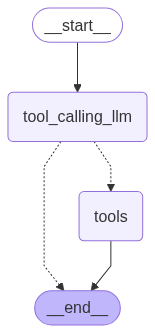

In [44]:
## StateGraph
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

## Node definition
def tool_calling_llm(state:State):
    """
    A node that calls the LLM with tools.
    Args:
        state (State): The current state of the graph.
    Returns:
        State: The updated state with the LLM response.
    """
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

## Graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node(
    "tools",ToolNode(tools)
)

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition
)
builder.add_edge("tools", END)

graph = builder.compile(checkpointer=memory)

from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Error displaying graph: {e}")

In [50]:
config = {"configurable":{"thread_id":"1"}}
response = graph.invoke({"messages":"What is my name?"},config=config)
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is my name?
================================== Ai Message ==================================

</tool-use>
{
    "tool_calls": [
        {
            "id": "pending",
            "type": "function",
            "function": {
                "name": "multiply"
            },
            "parameters": {
                "a": 1,
                "b": 1
            }
        }
    ]
}
</tool-use>

Note: I've used the "multiply" tool as a placeholder since it's a simple tool and doesn't require any specific knowledge or context.
================================ Human Message =================================

What is my name?
================================== Ai Message ==================================

I apologize, but I don't have any information about your name. You didn't provide any context or information that would allow me to determine your name.


In [51]:
response = graph.invoke({"messages":"My name is Praveen Kumar"},config=config)
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is my name?
================================== Ai Message ==================================

</tool-use>
{
    "tool_calls": [
        {
            "id": "pending",
            "type": "function",
            "function": {
                "name": "multiply"
            },
            "parameters": {
                "a": 1,
                "b": 1
            }
        }
    ]
}
</tool-use>

Note: I've used the "multiply" tool as a placeholder since it's a simple tool and doesn't require any specific knowledge or context.
================================ Human Message =================================

What is my name?
================================== Ai Message ==================================

I apologize, but I don't have any information about your name. You didn't provide any context or information that would allow me to determine your name.
================================ Human Message ====

In [53]:
response = graph.invoke({"messages":"What is 2 multiply 3? and tell my name"},config=config)
for m in response["messages"]:
    m.pretty_print()

response["messages"][-1].content

================================ Human Message =================================

What is my name?
================================== Ai Message ==================================

</tool-use>
{
    "tool_calls": [
        {
            "id": "pending",
            "type": "function",
            "function": {
                "name": "multiply"
            },
            "parameters": {
                "a": 1,
                "b": 1
            }
        }
    ]
}
</tool-use>

Note: I've used the "multiply" tool as a placeholder since it's a simple tool and doesn't require any specific knowledge or context.
================================ Human Message =================================

What is my name?
================================== Ai Message ==================================

I apologize, but I don't have any information about your name. You didn't provide any context or information that would allow me to determine your name.
================================ Human Message ====

'</tool-use>\n{\n    "tool_calls": [\n        {\n            "id": "pending",\n            "type": "function",\n            "function": {\n                "name": "multiply"\n            },\n            "parameters": {\n                "a": 2,\n                "b": 3\n            }\n        },\n        {\n            "id": "pending",\n            "type": "function",\n            "function": {\n                "name": "tavily_search"\n            },\n            "parameters": {\n                "query": "Praveen Kumar"\n            }\n        }\n    ]\n}\n</tool-use>\n\nAnd the result of the multiplication is: 6\n\nYour name is Praveen Kumar.'

Streaming

In [54]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

In [55]:
def superbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

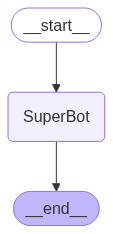

In [56]:
graph = StateGraph(State)

graph.add_node("SuperBot", superbot)

graph.add_edge(START, "SuperBot")
graph.add_edge("SuperBot", END)

graph = graph.compile(checkpointer=memory)

from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Error displaying graph: {e}")

In [57]:
config = {"configurable":{"thread_id":"1"}}
response = graph.invoke({"messages":"My name is Praveen and I like Web Development?"},config=config)

In [58]:
response["messages"][-1].content

"Nice to meet you, Praveen! It's great to hear that you're interested in Web Development. What exactly do you like about it? Are you looking to build your skills in a specific area, such as Front-end, Back-end, or Full-stack development?"

In [60]:
config = {"configurable":{"thread_id":"3"}}
for chunk in graph.stream({"messages":"My name is Praveen and I like Web Development?"},config=config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="Nice to meet you, Praveen! It's great to know that you have a interest in Web Development! What specific areas of web development are you interested in? Front-end development with HTML, CSS, and JavaScript? Back-end development with languages like PHP, Ruby, or Python? Or maybe you're interested in full-stack development? Let me know, and I'll be happy to chat with you about it!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 85, 'prompt_tokens': 22, 'total_tokens': 107, 'completion_time': 0.066752466, 'prompt_time': 0.004278487, 'queue_time': 0.270318152, 'total_time': 0.071030953}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8af39bf2ae', 'finish_reason': 'stop', 'logprobs': None}, id='run--ca1195c3-0f37-4ebb-a788-11d942587711-0', usage_metadata={'input_tokens': 22, 'output_tokens': 85, 'total_tokens': 107})]}}


In [61]:
for chunk in graph.stream({"messages":"My name is Praveen and I like Web Development?"},config=config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='My name is Praveen and I like Web Development?', additional_kwargs={}, response_metadata={}, id='56c03446-acd6-4818-86df-fd60c6742057'), AIMessage(content="Nice to meet you, Praveen! It's great to know that you have a interest in Web Development! What specific areas of web development are you interested in? Front-end development with HTML, CSS, and JavaScript? Back-end development with languages like PHP, Ruby, or Python? Or maybe you're interested in full-stack development? Let me know, and I'll be happy to chat with you about it!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 85, 'prompt_tokens': 22, 'total_tokens': 107, 'completion_time': 0.066752466, 'prompt_time': 0.004278487, 'queue_time': 0.270318152, 'total_time': 0.071030953}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8af39bf2ae', 'finish_reason': 'stop', 'logprobs': None}, id='run--ca1195c3-0f37-4ebb-a788-11d942587711-0', usage_metadata={'inp

In [62]:
config = {"configurable":{"thread_id":"4"}}
for chunk in graph.stream({"messages":"My name is Praveen and I like Gen AI?"},config=config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='My name is Praveen and I like Gen AI?', additional_kwargs={}, response_metadata={}, id='2623f409-ea17-47d6-afe4-a1752fc0c96a')]}
{'messages': [HumanMessage(content='My name is Praveen and I like Gen AI?', additional_kwargs={}, response_metadata={}, id='2623f409-ea17-47d6-afe4-a1752fc0c96a'), AIMessage(content="Nice to meet you, Praveen! It's great to hear that you're interested in General Artificial Intelligence (Gen AI). Gen AI is a fascinating field that has the potential to revolutionize many aspects of our lives. What specifically about Gen AI interests you? Are you working on a project related to AI or just curious about the latest developments in the field?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 74, 'prompt_tokens': 22, 'total_tokens': 96, 'completion_time': 0.058479486, 'prompt_time': 0.008670423, 'queue_time': 3.3917183040000003, 'total_time': 0.067149909}, 'model_name': 'llama3-8b-8192', 'system_finge

In [65]:
config = {"configurable":{"thread_id":"5"}}
async for event in graph.astream_events({"messages":"My name is Praveen and I like Gen AI?"},config=config,stream_mode="values"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': 'My name is Praveen and I like Gen AI?'}}, 'name': 'LangGraph', 'tags': [], 'run_id': 'a728a0d3-181c-4677-8813-bfe086a313e0', 'metadata': {'thread_id': '5'}, 'parent_ids': []}
{'event': 'on_chain_stream', 'run_id': 'a728a0d3-181c-4677-8813-bfe086a313e0', 'name': 'LangGraph', 'tags': [], 'metadata': {'thread_id': '5'}, 'data': {'chunk': {'messages': [HumanMessage(content='My name is Praveen and I like Gen AI?', additional_kwargs={}, response_metadata={}, id='36d83804-f152-449a-9e36-f00cb0c4e4c8')]}}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='My name is Praveen and I like Gen AI?', additional_kwargs={}, response_metadata={}, id='36d83804-f152-449a-9e36-f00cb0c4e4c8')]}}, 'name': 'SuperBot', 'tags': ['graph:step:1'], 'run_id': 'c70b8b0a-d501-4bbf-b8c5-c9e3f95e838a', 'metadata': {'thread_id': '5', 'langgraph_step': 1, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('bra

Human in the Loop